## Example end to end project.
This is an overview of the work flow. 
1. Look at the big picture
2. Get the data
3. Discover and visualize the data to gain insight
4. prepare the data for Machine Learning algorighms
5. Select a model and train it 
6. Fine-tune the model
7. Present the solution 
8. Launch, monitor, and maintain the system 

### Frame the problem
This is supervised learning task. Since the goal of the project is to predict housing price, it's a regression problem. The data is small enough to fit in the memory and plaiin batch learning is good enough.  

### Select performance measure
- RMSE Vs MAE
RMSE is generally prefered in this task. 

In [1]:
#Check working directory
import sys
sys.executable

'd:\\projects\\House_price_prediction\\venv\\Scripts\\python.exe'

In [2]:
#connecting to database & fetching data 
# import psycopg2
import pandas as pd
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

load_dotenv()

DATABASE_HOST = os.environ.get('DATABASE_HOST')
DATABASE_NAME = os.environ.get('DATABASE_NAME')
DATABASE_USER = os.environ.get('DATABASE_USER')
DATABASE_PASSWORD = os.environ.get('DATABASE_PASSWORD')

db_host = DATABASE_HOST
db_name = DATABASE_NAME
db_user = DATABASE_USER
db_password = DATABASE_PASSWORD

db_url = f'postgresql://{db_user}:{db_password}@{db_host}/{db_name}'
engine = create_engine(db_url)


In [3]:
# Execute a SQL query to retrieve data
table_name = DATABASE_NAME
df = pd.read_sql(table_name, engine)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#It seems like pandas interprets the columns as object data type and it needs to be converted to numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   longitude           20640 non-null  object
 1   latitude            20640 non-null  object
 2   housing_median_age  20640 non-null  object
 3   total_rooms         20640 non-null  object
 4   total_bedrooms      20433 non-null  object
 5   population          20640 non-null  object
 6   households          20640 non-null  object
 7   median_income       20640 non-null  object
 8   median_house_value  20640 non-null  object
 9   ocean_proximity     20640 non-null  object
dtypes: object(10)
memory usage: 1.6+ MB


In [6]:
# Convert columns to numeric
numeric_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

print(df.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [7]:
#See if there is any missing value in the dataset (NaN, null, NaT, etc.)
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [8]:
#Missing values in the dataset in percentile per column
for col in df:
    print(col,':', round(df[col].isnull().sum()/df.shape[0]*100, 3), '%')

longitude : 0.0 %
latitude : 0.0 %
housing_median_age : 0.0 %
total_rooms : 0.0 %
total_bedrooms : 1.003 %
population : 0.0 %
households : 0.0 %
median_income : 0.0 %
median_house_value : 0.0 %
ocean_proximity : 0.0 %


In [9]:
#Check for number of missing data for each column
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
#Summary of  the dataset
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


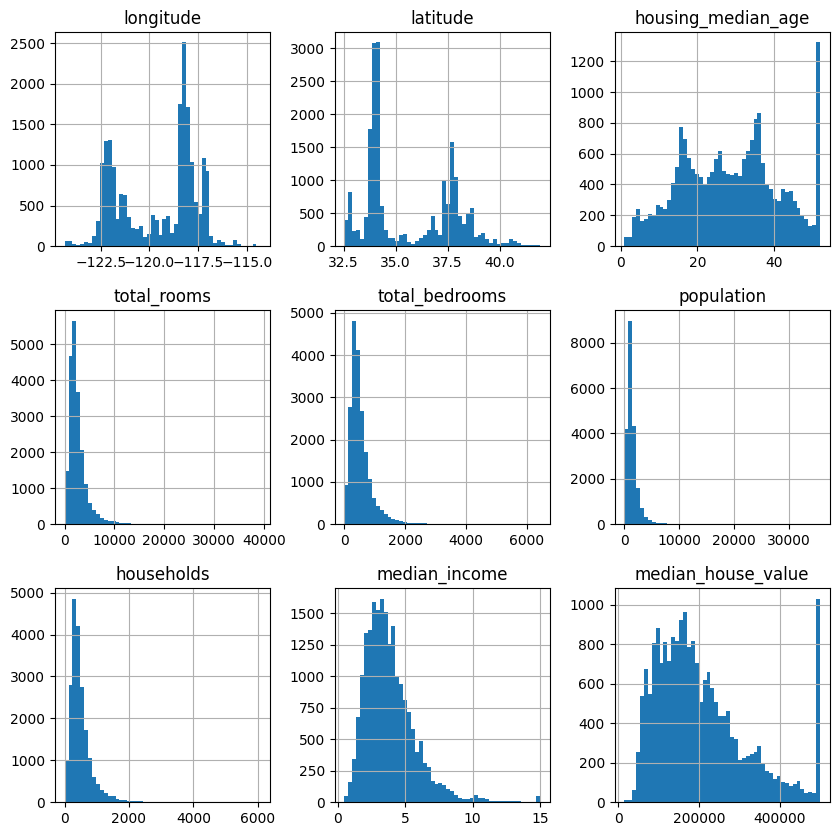

In [11]:
#Visualize the distribution of each column by ploting histograms for each column 
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(10, 10))
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

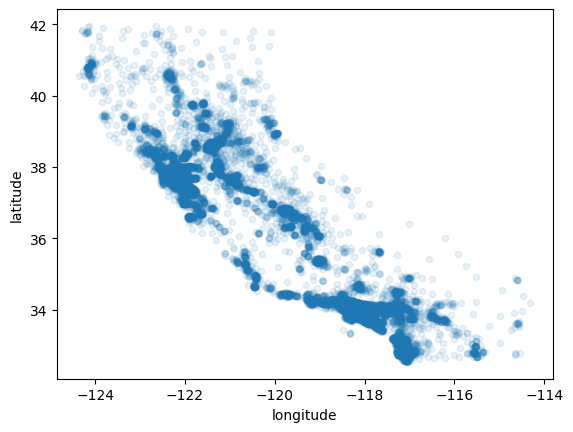

In [12]:
#Visualize density of data points
df.plot(kind='scatter', x='longitude', y='latitude', alpha = 0.1)

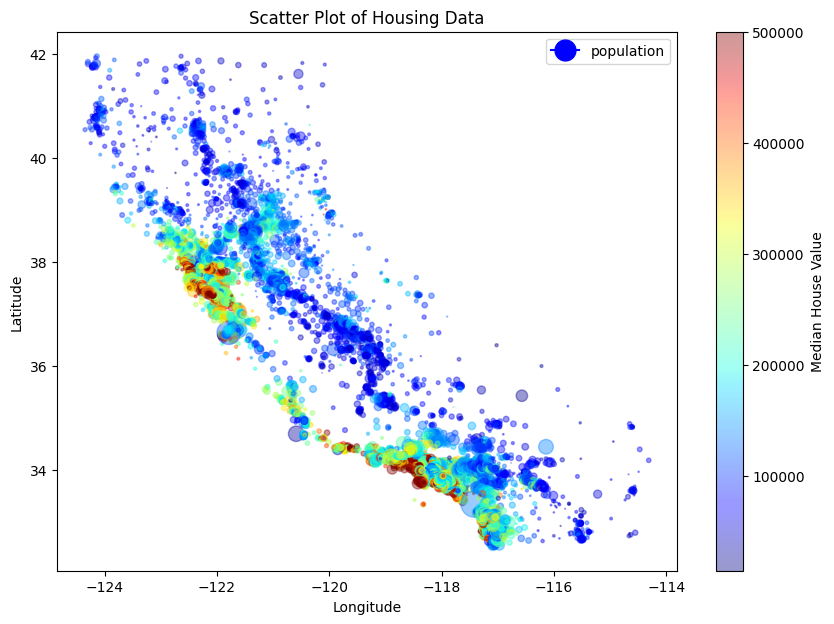

In [17]:
#Plot population size and median income values. set color of each point based on data value
#set size of the points in the scatter plot based on population column
# Add colorbar to the plot with a label
# Create a custom legend handler with a circle marker
# Create a custom legend handler with a circle marker
import matplotlib.lines as mlines

plt.figure(figsize=(10, 7))
scatter = plt.scatter(df['longitude'], df['latitude'], c=df['median_house_value'], cmap='jet', s=df['population']/100, alpha=0.4)
plt.colorbar(label='Median House Value')  # Add a colorbar with a label
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Housing Data')

# Create a custom legend with a circle marker
legend_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=15, label='population')
plt.legend(handles=[legend_circle])
plt.show()



In [14]:
#drop non numeric value.
df=df.drop('ocean_proximity', axis=1)
#check for correlations between the columns
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<Axes: >

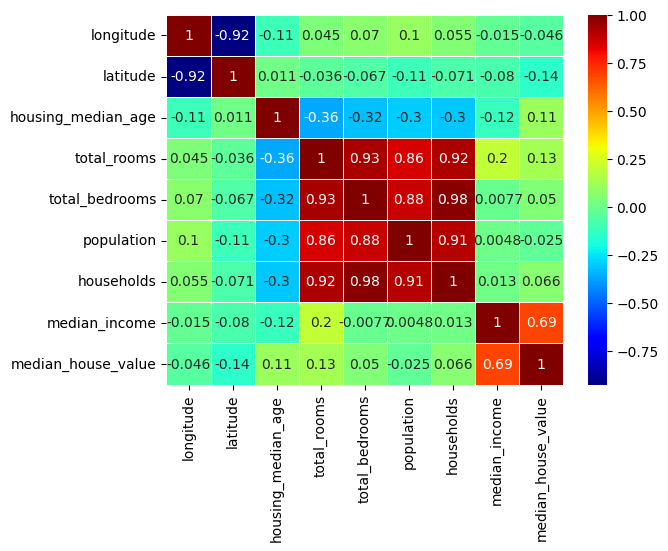

In [19]:
#visualize the correlation using heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=True, linewidth=.5, cmap='jet')